In [22]:
import pandas as pd
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

Import GORG-Dark metadata table

In [23]:
df = pd.read_csv("/home/jupyter-julia/storage/data/sag-data/gorg-dark/SAG_summary_20221107_cleaned.csv")

Output text to report information

In [24]:
print('There are',
      len(df),
      'SAGs described in GORG-Dark_v1')

There are 9178 SAGs described in GORG-Dark_v1


In [25]:
df.columns

Index(['SAG', 'field_sample_PI', 'geographic_region', 'expedition',
       'station_name', 'field_sample', 'latitude', 'longitude', 'depth',
       'field_collection_date', 'FACS_date', 'probe', 'SAG_type',
       'cell_diameter_µm', 'side_scatter', 'forward_scatter', 'X531.40_488',
       'X572.27_488', 'X692.40_488', 'trigger_pulse_width', 'WGA-X_cp',
       'raw_read_count', 'NextFlow_contigs', 'clean_contigs',
       'assembly_length', 'max_contig_length', 'gc_content',
       'completeness_CheckM1', 'completeness_CheckM2',
       'estimated_genome_size_CheckM2', 'coding_density', 'CDS',
       'perc_CDS_annotated', 'av_CDS_length', 'rRNA', 'tRNA',
       'gtdb_classification', 'ssu_classif_1', 'ssu_classif_2',
       'clusters_antiSMASH', 'products_antiSMASH', 'sequencer',
       'deliverables_folder', 'NextSeq_run_id', 'funding',
       'commercial_use_restrictions', 'depth_m'],
      dtype='object')

In [26]:
Counter(df['gtdb_classification']).most_common()[:10]

[('d__Archaea;p__Thermoproteota;c__Nitrososphaeria;o__Nitrososphaerales;f__Nitrosopumilaceae;g__Nitrosopelagicus;s__',
  786),
 ('d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Pelagibacterales;f__Pelagibacteraceae;g__AG-414-E02;s__',
  737),
 ('d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Pelagibacterales;f__Pelagibacteraceae;g__Pelagibacter;s__',
  623),
 ('d__Archaea;p__Thermoproteota;c__Nitrososphaeria;o__Nitrososphaerales;f__Nitrosopumilaceae;g__Nitrosopelagicus;s__Nitrosopelagicus sp000484935',
  482),
 ('d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__PS1;f__Thioglobaceae;g__Pseudothioglobus;s__',
  225),
 ('d__Archaea;p__Thermoproteota;c__Nitrososphaeria;o__Nitrososphaerales;f__Nitrosopumilaceae;g__Nitrosopelagicus;s__Nitrosopelagicus sp013390745',
  207),
 ('d__Archaea;p__Thermoproteota;c__Nitrososphaeria;o__Nitrososphaerales;f__Nitrosopumilaceae;g__Nitrosopelagicus;s__Nitrosopelagicus sp000402075',
  203),
 ('d__Bacteria;p__SAR324;c__SAR324;o__SAR3

How many bacteria and how many archaea?

<Axes: ylabel='count'>

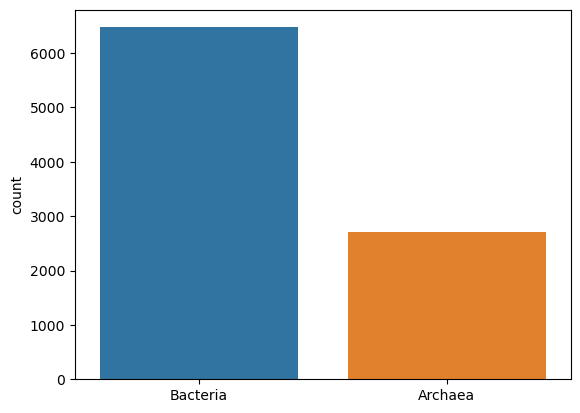

In [27]:
sns.countplot(x = [i.split(";")[0].split("__")[-1] for i in df['gtdb_classification']])

What's the geographic distribution?

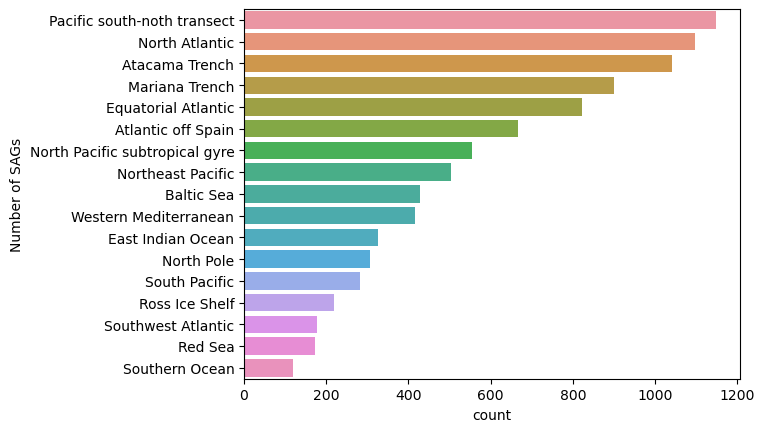

In [28]:
order = [i[0] for i in Counter(df['geographic_region']).most_common()]

sns.countplot(y = df['geographic_region'], order = order)

#plt.xticks(rotation = 90)
plt.ylabel('Number of SAGs')

plt.show()

Scatter plot  

Let's compare SAG assembly length and completeness.

<Axes: xlabel='assembly_length', ylabel='completeness_CheckM2'>

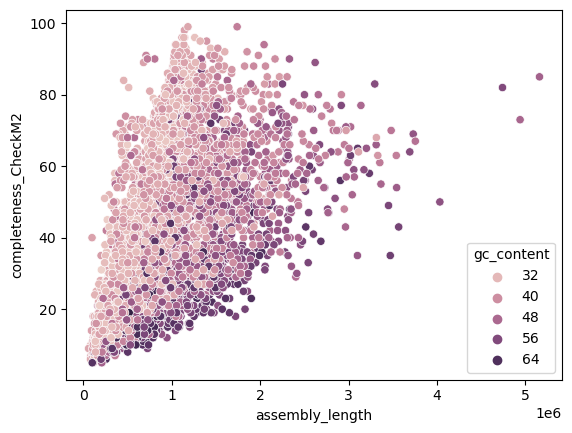

In [29]:
sns.scatterplot(x = 'assembly_length', y = 'completeness_CheckM2', hue = 'gc_content', data = df)

Ramunas' favorite plot:

In [32]:
df['plate'] = ["-".join(i.split("-")[:-1]) for i in df['SAG']]

In [33]:
df['plate']

0       AG-538
1       AG-538
2       AG-538
3       AG-538
4       AG-538
         ...  
9173    AM-390
9174    AM-390
9175    AM-390
9176    AM-390
9177    AM-390
Name: plate, Length: 9178, dtype: object

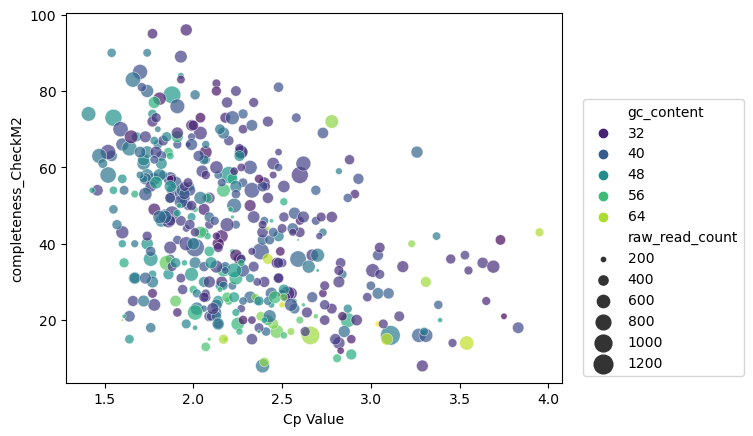

In [53]:
plates = ['AM-390', 'AM-388']

sdf = df[df['plate'].isin(plates)]

ax = sns.scatterplot(x = 'WGA-X_cp',
                y = 'completeness_CheckM2', 
                data = sdf,
                hue = 'gc_content',
                size = sdf['raw_read_count'] / 10000, 
               palette = 'viridis', 
               alpha = 0.7,   # makes dots transparent
                sizes = (0, 200))

ax.set(xlabel = 'Cp Value')
ax.legend(loc = 'lower right', bbox_to_anchor=(1.38, 0))
plt.show()

Plotting FACS data

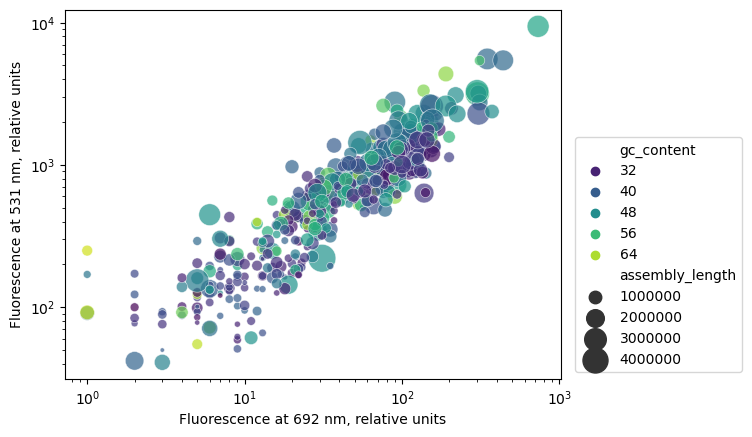

In [50]:
ax = sns.scatterplot(x = 'X692.40_488',
                y = 'X531.40_488', 
                data = sdf, 
                hue = 'gc_content',
                size = 'assembly_length',
                palette = 'viridis', 
                alpha = 0.7,   # makes dots transparent
                sizes = (10, 400))

ax.set(xscale = 'log',
       yscale = 'log', 
       xlabel = 'Fluorescence at 692 nm, relative units',
       ylabel = 'Fluorescence at 531 nm, relative units')

ax.legend(loc = 'lower right', ncol = 1, bbox_to_anchor=(1.38, 0))

plt.show()